In [2]:
# modules

import numpy as np
import matplotlib.pyplot as plt
from math import floor as flr
from matplotlib.animation import FuncAnimation

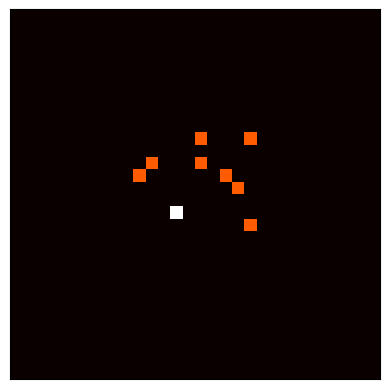

In [10]:
# maps

N_r = 30
N_c = 30

pher_food = np.zeros([N_r, N_c])
pher_home = np.zeros([N_r, N_c])
food_map = np.zeros([N_r, N_c])
home_map = np.zeros([N_r, N_c])

moves = [[1,0], [1,1], [0,1], [-1,1], [-1,0], [-1,-1], [0,-1], [1,-1]]

# ant class

class ant:
    def __init__(self, row, col, desire, in_travel, direction):
        self.row = row
        self.col = col
        self.desire = desire
        self.travel = in_travel
        self.dir = direction

    def found_food(self):
        self.dir = (self.dir + 4) % 8
        self.desire = "home"
    
    def reached_home(self):
        self.dir = (self.dir + 4) % 8
        self.desire = "food"

    def move(self):

        # leave pheromones

        if self.desire == "home":
            pher_home[self.row, self.col] += 1
        if self.desire == "food":
            pher_food[self.row, self.col] += 1

        # find if you have food in front of you

        food = False
        for i in [-1, 0, 1]:
            if food_map[(self.row + moves[flr((self.dir+i)%8)][0])%29, (self.row + moves[flr((self.dir+i)%8)][1])%29] > 0:

                # if you do, take it
                food_map[(self.row + moves[flr((self.dir+i)%8)][0])%29, (self.row + moves[flr((self.dir+i)%8)][1])%29] -= 1
                
                # and run
                self.dir = (self.dir + 4) % 8
                
                break


        # change (maybe) direction

        i = np.random.choice(a = [-1,0,1], size = 1)

        self.dir = (self.dir + i) % 8

        # let's go

        self.row += moves[flr(self.dir)][0]
        self.row = self.row % 30
        self.col += moves[flr(self.dir)][1]
        self.col = self.col % 30
        
# ant colony

ants_number = 10
colony = []
for a in range(ants_number):
    spawn = np.random.choice(a = np.array(range(10,20)), size = 2)
    where = np.random.choice(np.array(range(9)))
    colony.append(ant(spawn[0], spawn[1], "food", 0, where))

frames = []

time = 30

for t in range(time):
    map = np.zeros([30, 30])
    for ant in colony:
        map[ant.row, ant.col] += 1
        ant.move()
    frames.append(pher_food.copy())

# let's prepare animation

map = np.zeros([30, 30])

fig = plt.figure()
ax = plt.axes()
im = ax.imshow(pher_food, cmap = "hot")

def init():
    im.set_data(pher_food, cmap = "hot")
    return [im]

def animate(i):
    im = ax.imshow(frames[i], cmap = "hot")
    ax.tick_params(labelleft = False, labelbottom = False, bottom = False, left = False)
    return [im]

# create and save animation to file

animation = FuncAnimation(fig, animate, frames = time)
animation.save("Lab9/Chemtrails.gif")